In [5]:

import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('datasets_156197_358170_Churn_Modelling.csv')

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


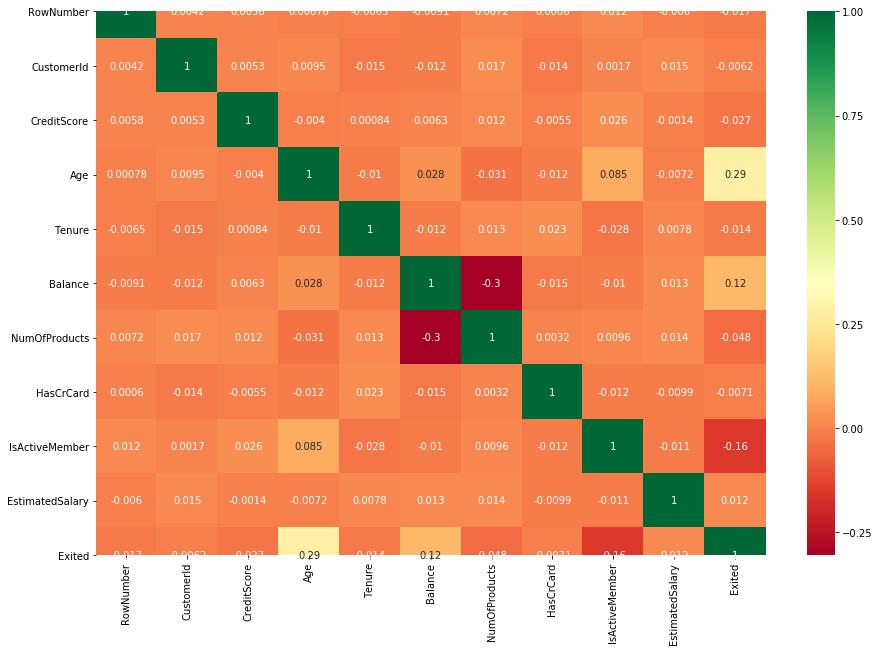

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
corr_features = corr.index
plt.figure(figsize = (15,10))
sns.heatmap(df[corr_features].corr(),annot = True,cmap = 'RdYlGn')

In [18]:
X = df.iloc[:,3:13]
Y = df.iloc[:,-1]

In [26]:
# Make dummies variables for 2 columns to make numeric
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [30]:
X = X.drop(['Geography','Gender'],axis = 1)

In [35]:
# Now check Hyperparameter Optimization.
params = {'max_depth':[3,4,5,6,8,10,12,15],
         'learning_rate':[0.05,0.10,0.20,0.25,0.30],
         'min_child_weight':[1,3,5,7],
         'gamma':[0.0,0.1,0.2,0.3,0.4],
         'colsample_bytree':[0.3,0.4,0.5,0.7]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost

In [44]:
classifier = xgboost.XGBClassifier()
from xgboost import XGBClassifier

In [37]:
random_search = RandomizedSearchCV(classifier , param_distributions = params , n_iter = 5 ,scoring = 'roc_auc',n_jobs = -1 , cv = 5 ,verbose = 3)


In [40]:
from datetime import datetime
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [41]:
# Best estimator give the  best parameter which we can use for our model building
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier , X, Y,cv = 10)
score

array([0.851, 0.844, 0.852, 0.834, 0.851, 0.838, 0.839, 0.858, 0.845,
       0.841])

In [47]:
score.mean()

0.8452999999999999